<h1>Dashboard com dados do IBGE</h1>

<h3>Introdução</h3>
Este projeto consiste em utilizar um dataset da base de dados do IBGE, disponível no site SIDRA. O conjunto de dados escolhido trata de domicílios onde nenhum morador viajou em um determinado período. O objetivo é analisar os motivos que levaram as pessoas a não viajarem e extrair insights a partir dessa análise.

<h3>Vamos começar instalando a biblioteca do sidrapy</h3>
O sidrapy é uma biblioteca para puxarmos dados pela api do sidra.

In [5]:
!pip install sidrapy

<h3>Importando as bibliotecas</h3>

In [6]:
import pandas as pd
import sidrapy 
import seaborn as sns

<h3>Importando o dataset através da API do SIDRA</h3>
<ul>
    <li>Podemos checar os parâmetros na API do SIDRA a partir do link:  
        <a href="https://apisidra.ibge.gov.br/desctabapi.aspx?c=8455" target="_blank">API SIDRA</a>  
    </li>
    <li>Essa chamada nos retorna um DataFrame Pandas, então podemos utilizar normalmente todos os métodos da biblioteca Pandas.</li>
</ul>

In [11]:
df = sidrapy.get_table (
    table_code = "8455", 
    territorial_level = "1",
    ibge_territorial_code = "all", 
    period = "all",
    classifications = {
        "652": "allxt",
        "899": "allxt"
    }
)

<h3>Visualizando o topo dos dados</h3>

In [12]:
df.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Ano (Código),Ano,Rendimento mensal domiciliar per capita (Código),Rendimento mensal domiciliar per capita,Motivo de nenhum morador ter viajado (Código),Motivo de nenhum morador ter viajado,Variável (Código),Variável
1,1,Brasil,48,Mil unidades,7508,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10437,Domicílios em que nenhum morador viajou
2,1,Brasil,2,%,1.6,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10438,Coeficiente de variação - Domicílios em que ne...
3,1,Brasil,2,%,48.8,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10439,Distribuição percentual dos domicílios em que ...
4,1,Brasil,2,%,1.2,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10440,Coeficiente de variação - Distribuição percent...


<h3>Promovendo a primeira linha a cabeçalho</h3>
Como a primeira linha do DataFrame contém o cabeçalho real, vamos promovê-la para cabeçalho e, em seguida, removê-la para tornar os dados mais intuitivos.

In [14]:
df.columns = df.iloc[0]
df = df.iloc[1:, ]

In [15]:
df.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Ano (Código),Ano,Rendimento mensal domiciliar per capita (Código),Rendimento mensal domiciliar per capita,Motivo de nenhum morador ter viajado (Código),Motivo de nenhum morador ter viajado,Variável (Código),Variável
1,1,Brasil,48,Mil unidades,7508,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10437,Domicílios em que nenhum morador viajou
2,1,Brasil,2,%,1.6,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10438,Coeficiente de variação - Domicílios em que ne...
3,1,Brasil,2,%,48.8,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10439,Distribuição percentual dos domicílios em que ...
4,1,Brasil,2,%,1.2,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48023,Não ter dinheiro,10440,Coeficiente de variação - Distribuição percent...
5,1,Brasil,48,Mil unidades,686,1,Brasil,2020,2020,57490,Menos de 1/2 salário mínimo,48024,Não ter tempo,10437,Domicílios em que nenhum morador viajou


<h3>Tratando os valores não numéricos dentro de valor para aplicar o pivot_table</h3>
Como a informação que queremos analisar está presente nas linhas do dataset e não nas colunas, vamos realizar um pivot para transformá-las em colunas, facilitando a análise. No entanto, esse método do Pandas aceita apenas valores numéricos, e o tipo atual dos dados é object.

In [17]:
df.Valor.describe()

count     420
unique    241
top       4.0
freq        9
Name: Valor, dtype: object

In [18]:
df["Valor"].unique()

array(['7508', '1.6', '48.8', '1.2', '686', '5.2', '4.5', '822', '5.5',
       '5.3', '243', '8.2', '8.0', '1017', '3.8', '6.6', '3.5', '3366',
       '2.1', '21.9', '1729', '4.0', '11.2', '3.7', '6948', '1.9', '37.1',
       '1.5', '1505', '3.3', '1350', '7.2', '543', '5.8', '2.9', '5.6',
       '1524', '8.1', '3.9', '3671', '2.3', '19.6', '2.2', '3187', '3.2',
       '17.0', '4561', '2.4', '27.7', '2011', '12.2', '3.1', '1477',
       '9.0', '4.4', '541', '1431', '3.6', '8.7', '3072', '2.8', '18.7',
       '2.6', '3363', '2.7', '20.4', '1122', '4.3', '16.2', '1111', '4.2',
       '16.1', '786', '7.1', '11.4', '6.4', '246', '7.5', '7.6', '656',
       '9.5', '6.3', '1162', '16.8', '1837', '26.5', '253', '8.9', '6.9',
       '8.5', '566', '15.4', '371', '10.1', '8.6', '130', '10.5', '10.6',
       '373', '7.4', '10.2', '473', '7.9', '12.9', '5.4', '41.0', '8187',
       '1.7', '44.4', '1.4', '724', '5.1', '5.0', '1173', '4.6', '341',
       '6.0', '1.8', '1212', '4407', '23.9', '2395',

In [20]:
df["Valor"] = pd.to_numeric(df["Valor"], errors = "coerce")

<h3>Fazendo o pivot no dataframe para podermos analisar os motivos para uma pessoa não ter feito uma viagem</h3>

In [24]:
df = df.pivot_table (
    index = ["Ano", "Rendimento mensal domiciliar per capita"],
    columns = ["Motivo de nenhum morador ter viajado"],
    values = "Valor",
    fill_value = 0
).reset_index()

In [25]:
df

Motivo de nenhum morador ter viajado,Ano,Rendimento mensal domiciliar per capita,Não ser prioridade,Não ter dinheiro,Não ter interesse,Não ter necessidade,Não ter tempo,Outro,Problemas de saúde
0,2020,1 a menos de 2 salários mínimos,373.725,1148.325,361.700,774.025,507.375,847.175,138.675
1,2020,1/2 a menos de 1 salário mínimo,341.550,1747.125,385.000,923.775,379.900,802.525,139.325
2,2020,2 a menos de 4 salários mínimos,202.725,286.625,169.600,296.850,283.800,467.650,66.175
3,2020,4 ou mais salários mínimos,99.800,69.325,99.450,125.225,148.725,388.850,38.650
4,2020,Menos de 1/2 salário mínimo,209.525,1889.900,257.725,848.025,175.225,436.975,65.200
5,2021,1 a menos de 2 salários mínimos,422.900,891.625,301.250,747.875,448.025,943.825,131.925
6,2021,1/2 a menos de 1 salário mínimo,417.725,1583.875,385.525,1004.750,355.250,863.400,178.175
7,2021,2 a menos de 4 salários mínimos,188.250,209.625,141.525,292.250,227.300,531.375,69.750
8,2021,4 ou mais salários mínimos,89.150,53.250,66.225,123.950,108.600,351.275,28.500
9,2021,Menos de 1/2 salário mínimo,297.100,2058.625,306.450,1108.850,184.500,603.525,88.700


<h3>Checando se todas as colunas estão com a tipagem correta</h3>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Ano                                      15 non-null     object 
 1   Rendimento mensal domiciliar per capita  15 non-null     object 
 2   Não ser prioridade                       15 non-null     float64
 3   Não ter dinheiro                         15 non-null     float64
 4   Não ter interesse                        15 non-null     float64
 5   Não ter necessidade                      15 non-null     float64
 6   Não ter tempo                            15 non-null     float64
 7   Outro                                    15 non-null     float64
 8   Problemas de saúde                       15 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.2+ KB


<h3>Gerando gráficos histogramas e dipersão para vermos a distribuição dos dados</h3>

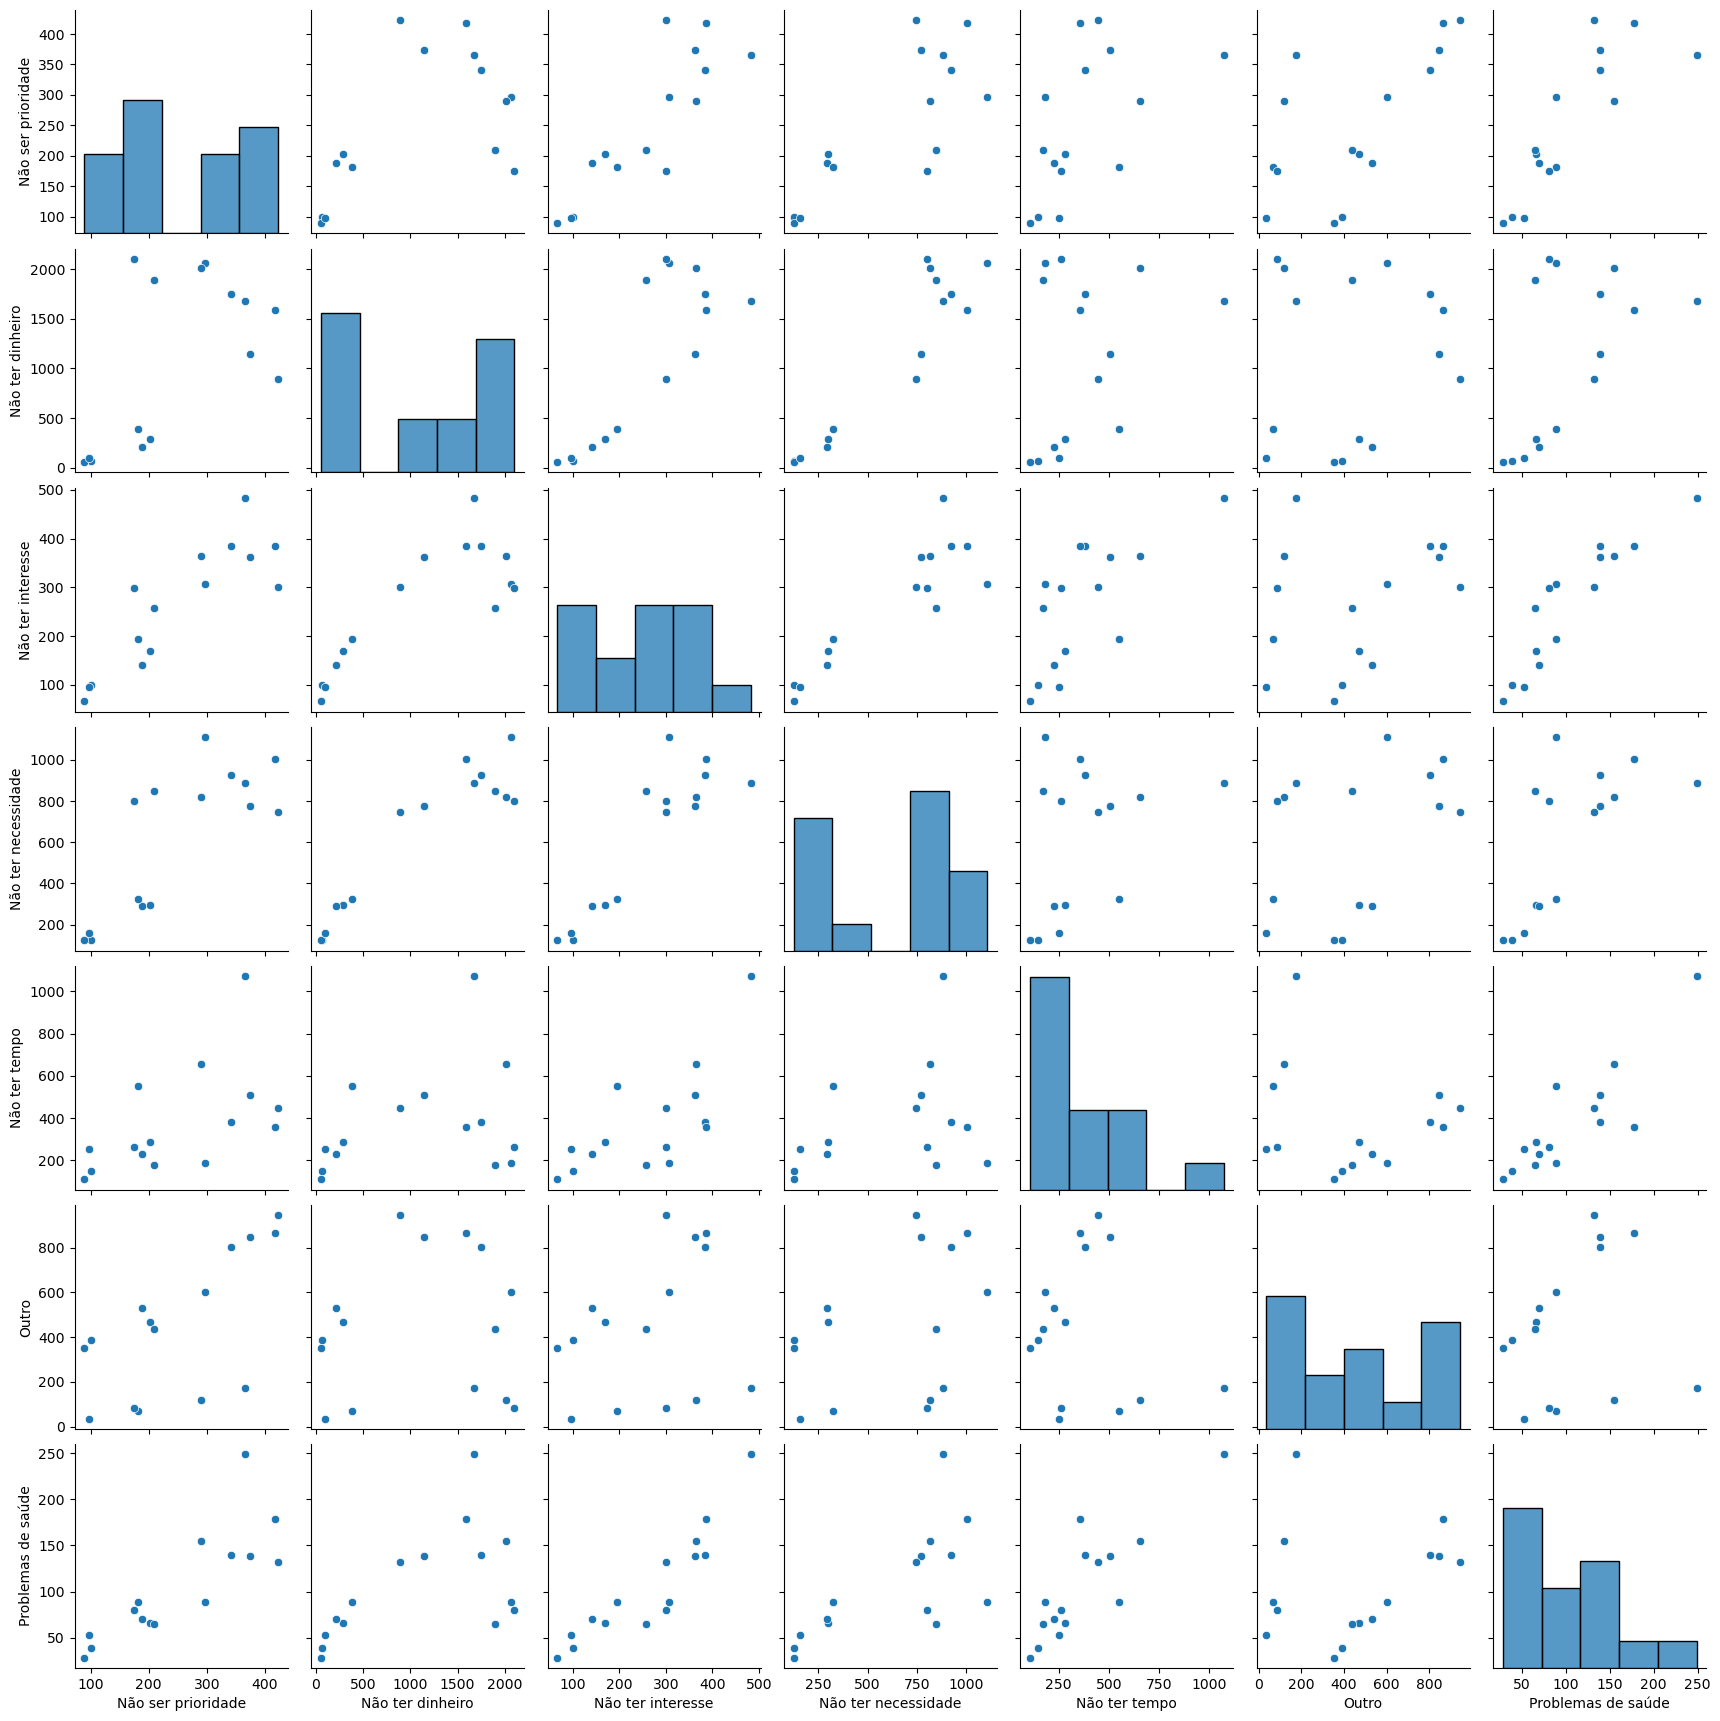

In [28]:
sns.pairplot(df)

<h3>Salvando o arquivo para levarmos ao Power BI</h3>

In [30]:
df.to_csv("base_ibge.csv", index = False, encoding = "utf-8")